In [1]:
import torch 
torch.manual_seed(1)
import sys
sys.path.append('..\..')

from targets import Target
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
from models import MixedModelDensityEstimator
from models import DIFDensityEstimatorLayer
from models import RealNVPDensityEstimatorLayer

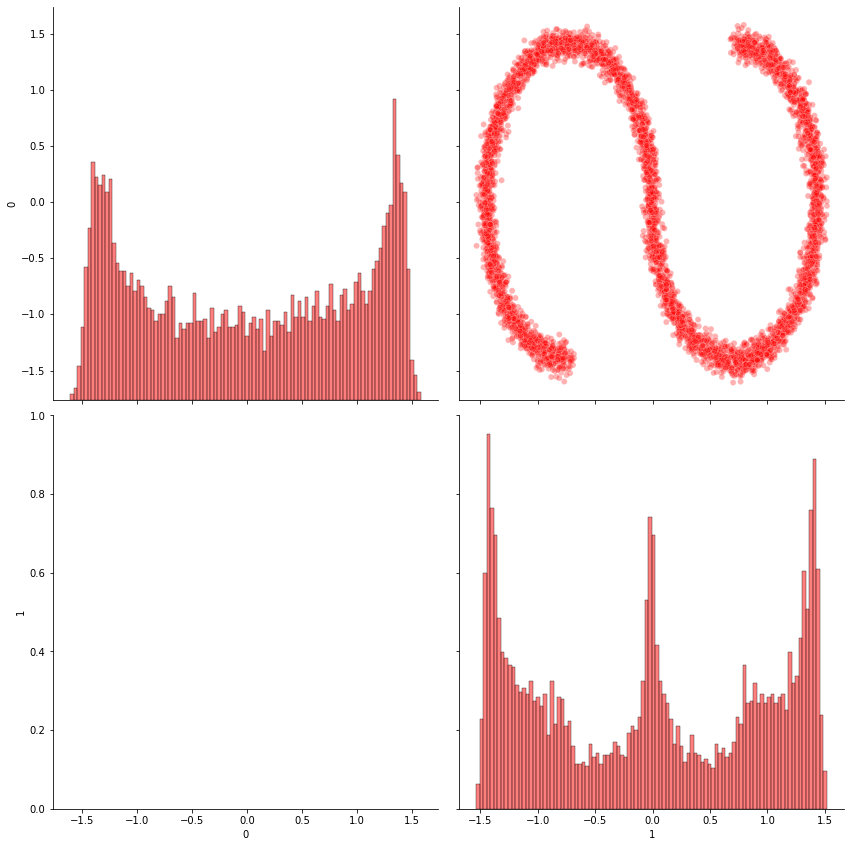

In [5]:
example =  "S Curve"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [39:02<00:00,  1.28it/s, loss = 0.692314863204956]


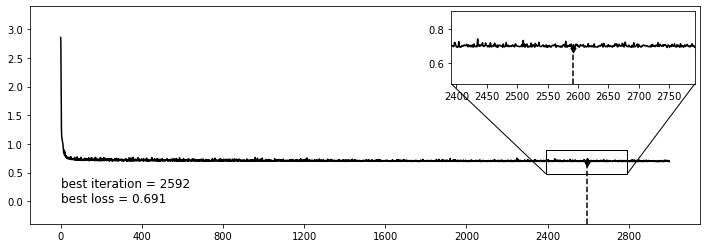

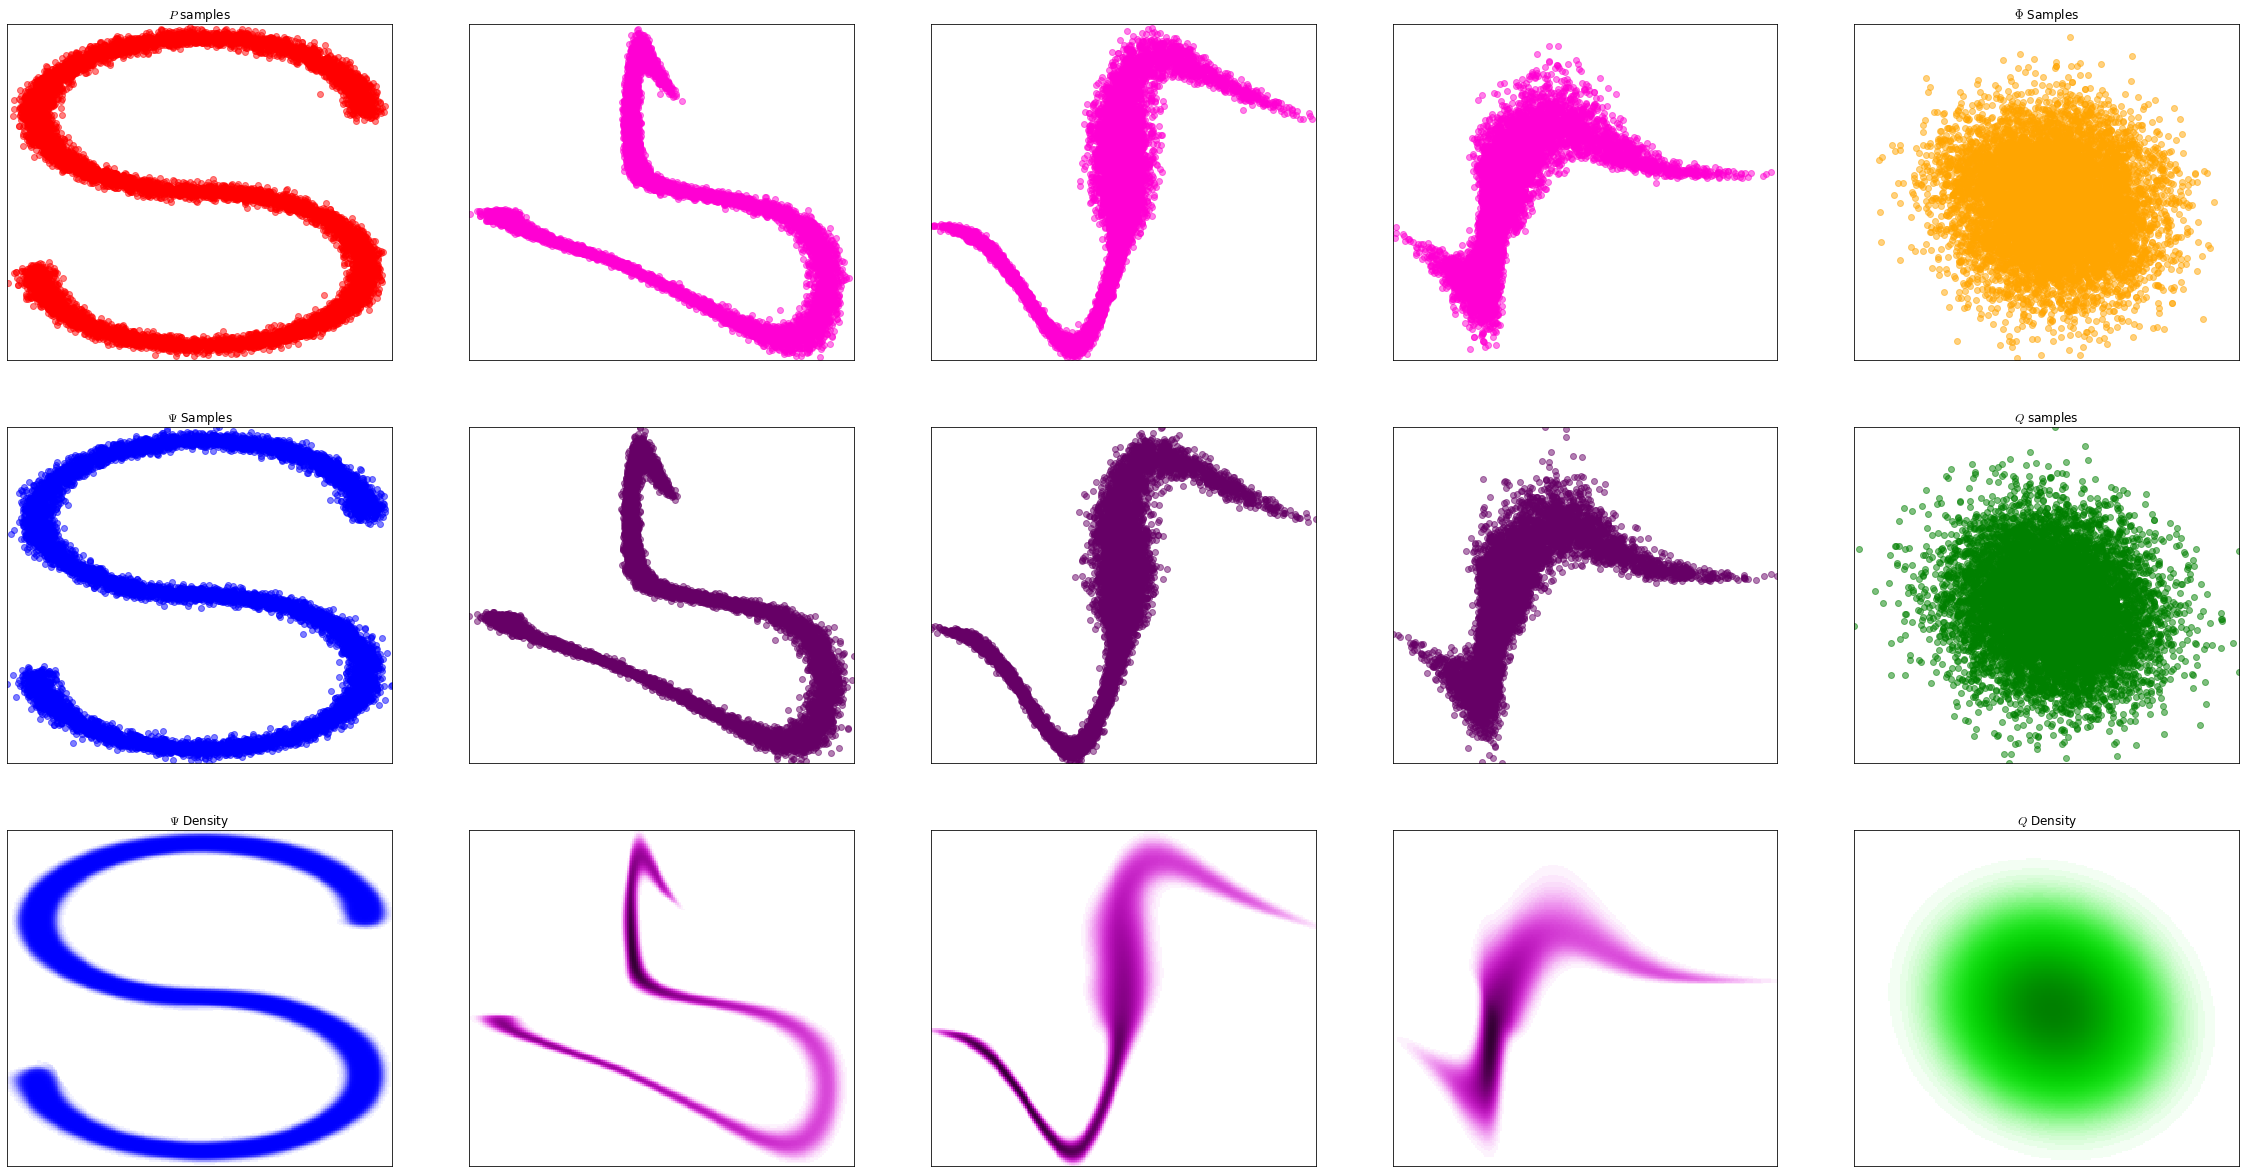

In [7]:
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/50)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

In [9]:
from models import MixedModelSampler
from models import RealNVPSamplerLayer

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [1:11:35<00:00,  1.43s/it, loss = 2.8495607376098633]


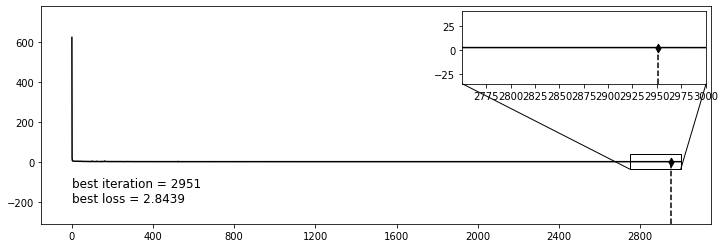

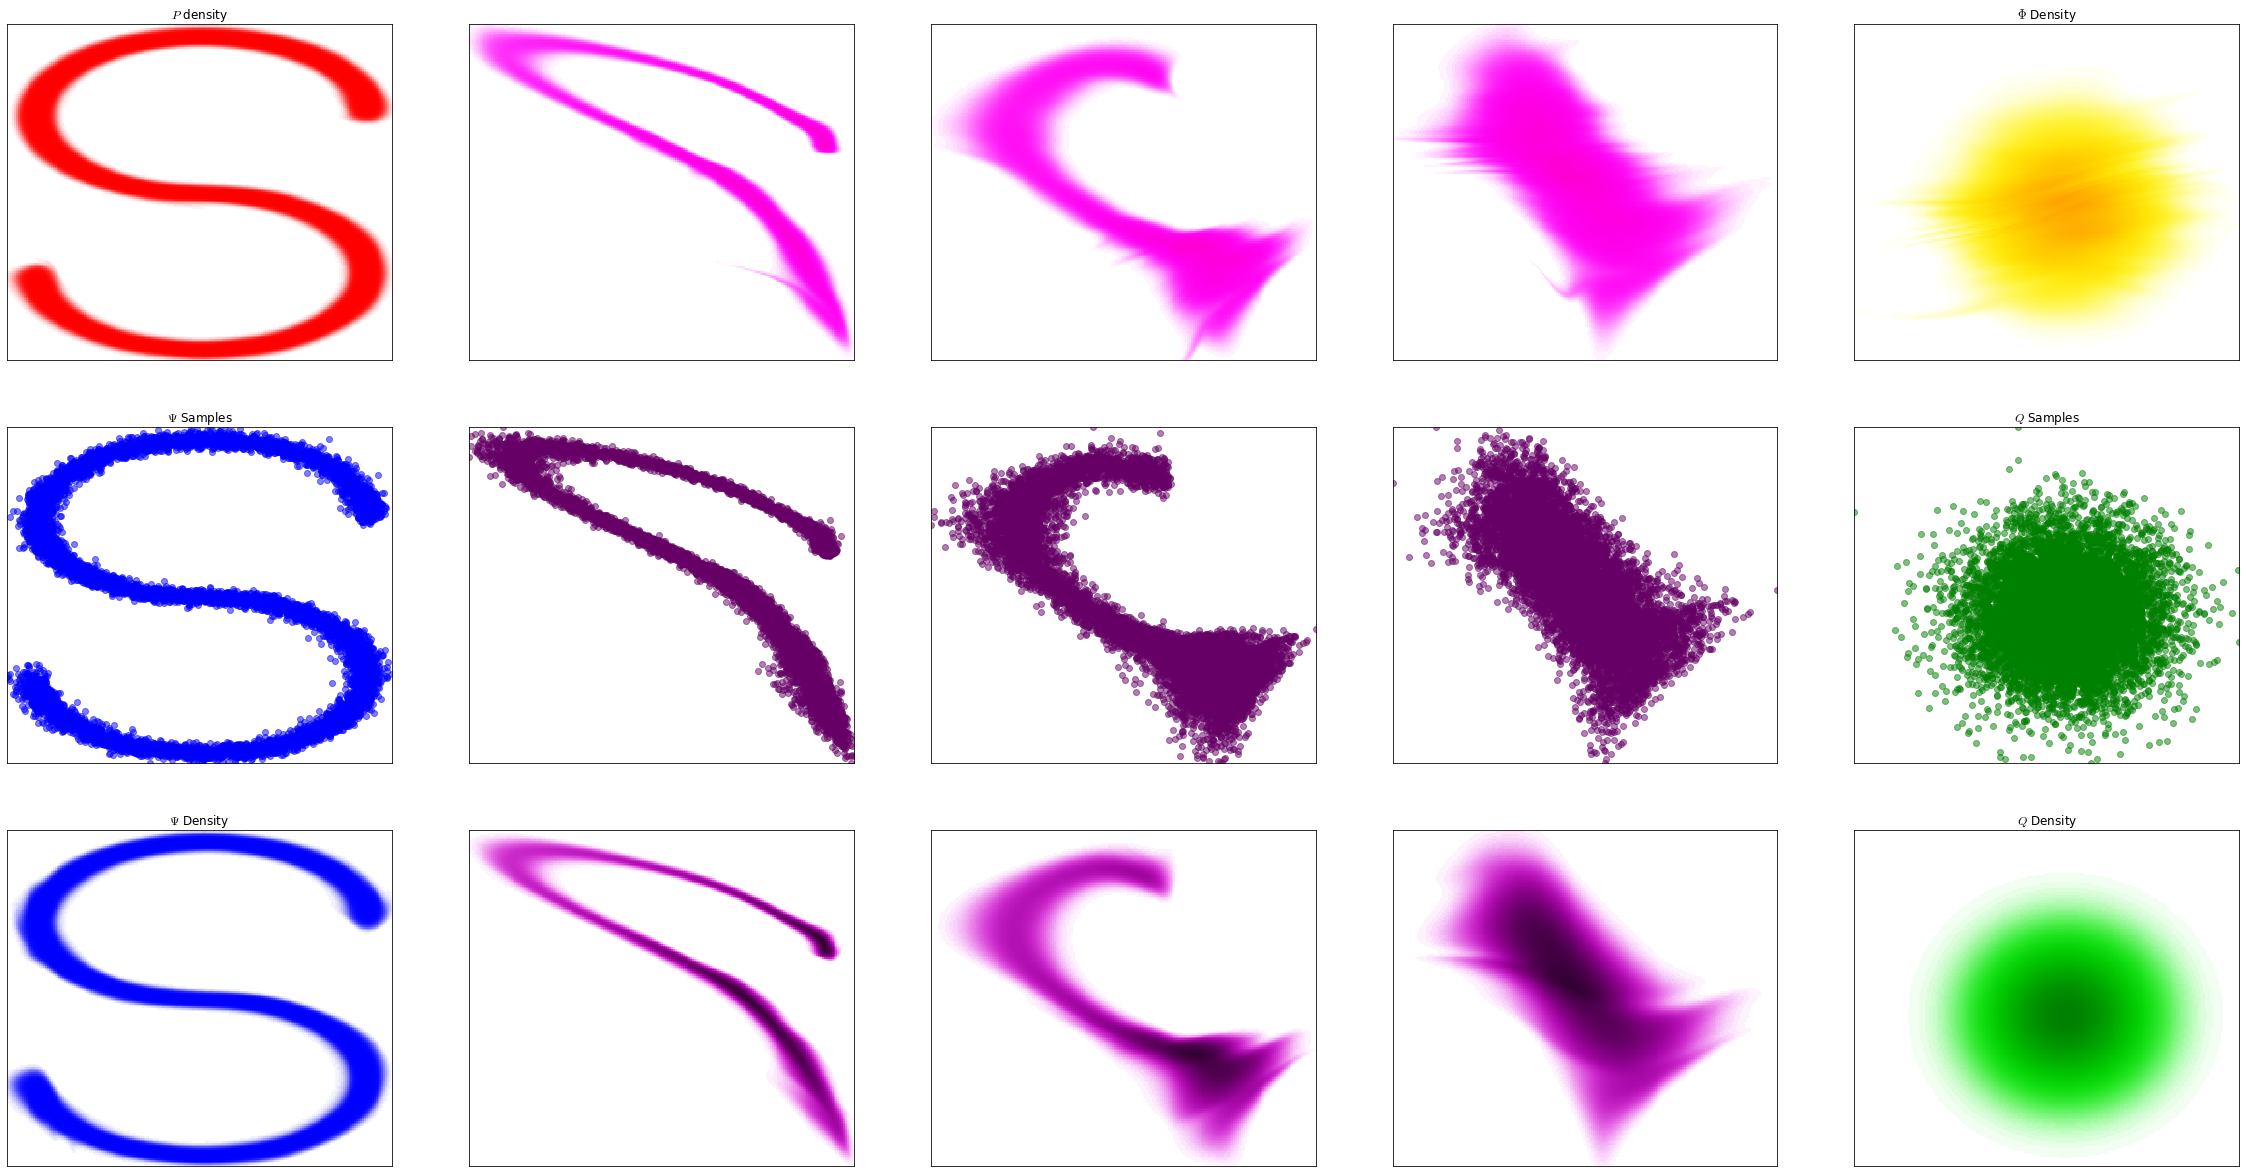

In [14]:
target_log_density = realnvp.log_density
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/50)
structure = [[RealNVPSamplerLayer,[512,512,512]],[RealNVPSamplerLayer,[512,512,512]],[RealNVPSamplerLayer,[512,512,512]],[RealNVPSamplerLayer,[512,512,512]]]
realnvp_sampler = MixedModelSampler(target_log_density,2,structure)
realnvp_sampler.train(num_samples,epochs,batch_size, visual = True)
realnvp_sampler.model_visual(num_samples=int(num_samples/5), flow = True)